

# The Table example

Where frequentist and Bayesian differ. [http://www.rpgroup.caltech.edu/courses/PBoC_CSHL_2015/files_2015/articles/eddy%20bayesian%20methods.pdf]

Problem is to find the conditional probability of Bob wining given that Alice has won 5 and Bob 3. The game is won whoever reaches 6 points first!

## P(Bob | A=5, B=3) ?

In [6]:
import scipy.stats as stats
import numpy as np



In [43]:

prob_bob_wining = np.array([])

for j in range(100):
    count_alice_win = 0
    count_bob_win = 0
    count_cond_hit = 0

    for i in range(10000):
        # Select random p 
        p = np.random.uniform(0,1)
        alice = 0
        bob = 0

        flag_condition = False
        
        # Loop till anyone wins. The game ends when anyone reaches 6 points
        while (alice < 6 and bob < 6):
            #The outcome of a single trial game
            outcome = np.random.binomial(1, p)
            
            #Alice wins if outcome is 1
            alice += outcome
            #Bob winsif outcome is 0
            bob += (1 - outcome)

            #The condition which is provided in the problem
            if (alice == 5 and bob == 3):
                flag_condition = True
                count_cond_hit += 1

        #Someone has won the game
        #checking if the condition was hit
        #in such condition how many times did bob win
        if flag_condition:
            if 6 == alice:
                count_alice_win += 1
            else:
                count_bob_win += 1
    
    #The divison of condition_hit to the time bob win is the
    #condition probability of Bob wining given P(Bob| A=5, B=3)
    prob_bob_wining = np.append(prob_bob_wining, count_bob_win/ count_cond_hit)

print ("P : ",p ," condition hit : ", count_cond_hit)
print ("Bob win after condition : ", count_bob_win)
print ("Alice win after condition : ", count_alice_win)
print ("Bob chance of wining ::   ", count_bob_win/count_cond_hit)

P :  0.15598397788391893  condition hit :  1170
Bob win after condition :  111
Alice win after condition :  1059
Bob chance of wining ::    0.09487179487179487


(array([  1.,   4.,  11.,  13.,  20.,  20.,  21.,   7.,   2.,   1.]),
 array([ 0.07123034,  0.0753562 ,  0.07948206,  0.08360792,  0.08773378,
         0.09185964,  0.09598549,  0.10011135,  0.10423721,  0.10836307,
         0.11248893]),
 <a list of 10 Patch objects>)

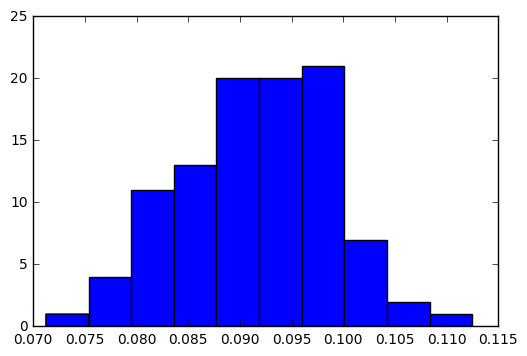

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plotting the conditional probability of p(Bob| A=5, B=3) 
plt.hist(prob_bob_wining)

# Bayesian view of Bob wining : Analytic Solution
{See the document for the proof}

This is a special case of Bayesian analysis in which we can can have a analytic solution. (Not true for all other cases of bayesian analysis)

$$ P( Bob | A=5, B=3 ) = \frac {B(5+a,3+b+3) }{B(5+a,3+b)} $$

In [3]:
import math
 
a_1 = 1 #prior
a_2 = 1 #prior for uniform beta distribution. Non informative prior

def beta_1(a,b):
     
    '''uses gamma function or inbuilt math.gamma() to compute values of beta function'''
     
    beta = math.gamma(a)*math.gamma(b)/math.gamma(a+b)
    return beta


print (beta_1(5 + a_1, 3+a_2+3) / beta_1(5 + a_1, 3 + a_2 ))


0.09090909090909091


# Conclusion

## Frequentist of Bob wining = $(5/3)^3 $ = 1/18 = 0.05


## Bayesian of Bob wining  = 0.09 $\sim$ 1/10

## By Bootstrapping = 0.09-0.1 $\sim$ 1/10

# Coin example : Two heads

http://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

Need to find

# P(HH | H=10, T=4 ) ?

# Bootstraping method

In [7]:

count_2_heads = 0
count_condition_hit = 0

percentage_of_2_heads = np.array([])
#for p in np.arange(0.1, 1, 0.1):
for j in range(100000):
    

    #for i in range(10000):
    #randomly find a p value
    p = np.random.uniform(0,1)

    #Toss the coint 14 times
    outcome = np.random.binomial(1,p, 14)

    #Check if the coin toss had 10 heads
    if (10 == outcome.sum() ):
        count_condition_hit += 1
        
        #Find the probability of 2 heads
        heads_2 = np.random.binomial(1,p, 2)
 
        # Check if there are 2 heads
        if (2 == heads_2.sum()):
            count_2_heads += 1

    #print ("For P : ", p ,"Condition Hit : ", count_condition_hit, "Count 2 heads : ", count_2_heads)
    #if (count_condition_hit):
    #    print ("Percentage of 2 Heads : ", (count_2_heads/ count_condition_hit))
    #else:
    #    print ("Precentage of 2 Heads : ", 0)
    if (count_condition_hit):
        percentage_of_2_heads = np.append(percentage_of_2_heads, (count_2_heads/ count_condition_hit))
    
print ("Percentage of 2 Heads : ", (count_2_heads/ count_condition_hit))

Percentage of 2 Heads :  0.47881743370923496


# Bayesian Approach

 $$ P ( HH | data ) = \frac {B(10+a+2,4+b) } {B(10+a,4+b)} $$

In [91]:
import math
 
def beta_1(a,b):
     
    '''uses gamma function or inbuilt math.gamma() to compute values of beta function'''
     
    beta = math.gamma(a)*math.gamma(b)/math.gamma(a+b)
    return beta


print (beta_1(10 + 1 + 2, 4+1) / beta_1(10 + 1 , 4 + 1 ))


0.4852941176470588


# Conclusion

## Frequentist answer of 2 Heads = $(10/14)^2 \sim 0.51 $  


## Bayesian answer of 2 Heads  = 0.485 

## By Bootstrapping = 0.47 

# Bayesian Modelling 


Beta-Bernoulli Model for coin example.

The below sections discusses estimating the latent(hidden) P value of the Bernoulli distribution.

Adopted From :

[http://www.chadfulton.com/posts/bernoulli_trials_bayesian.html](Bernoulli Trials in Python: Bayesian Estimation)

[http://www.chadfulton.com/posts/bernoulli_trials_classical.html](Bernoulli Trials in Python: Classical Estimation)

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
#import sympy as sp
import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma
import seaborn as sns

plt.style.use('classic')
#from sympy.interactive import printing
#printing.init_printing()

In [71]:
# Simulate data
np.random.seed(123)

nobs = 14
theta = 0.71
Y = np.random.binomial(1, theta, nobs)
print  (Y.sum())

11


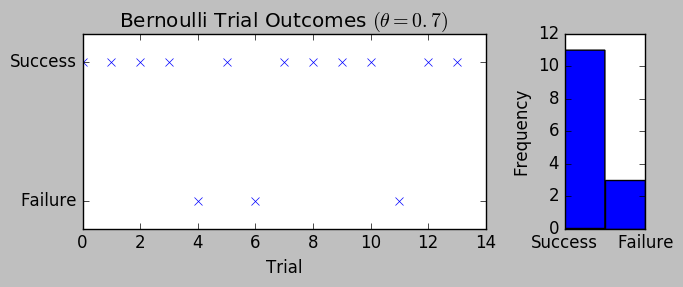

In [72]:


# Plot the data
fig = plt.figure(figsize=(7,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(range(nobs), Y, 'x')
ax2.hist(-Y, bins=2)

ax1.yaxis.set(ticks=(0,1), ticklabels=('Failure', 'Success'))
ax2.xaxis.set(ticks=(-1,0), ticklabels=('Success', 'Failure'));

ax1.set(title=r'Bernoulli Trial Outcomes $(\theta=0.7)$', xlabel='Trial', ylim=(-0.2, 1.2))
ax2.set(ylabel='Frequency')

fig.tight_layout()



Posterior Mean (Analytic): 0.75


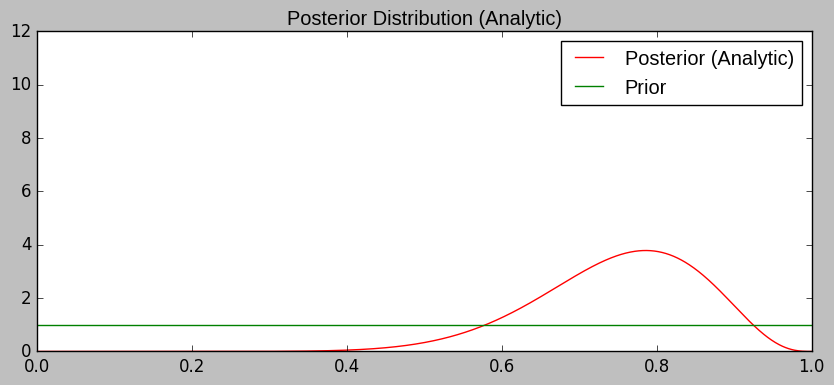

In [73]:
# For alpha_1 = alpha_2 = 1, the Beta distribution
# degenerates to a uniform distribution
a1 = 1
a2 = 1

# Find the hyperparameters of the posterior
a1_hat = a1 + Y.sum()
a2_hat = a2 + nobs - Y.sum()

# Posterior Mean
post_mean = a1_hat / (a1_hat + a2_hat)
print ('Posterior Mean (Analytic):', post_mean)

# Plot the analytic posterior
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a1_hat, a2_hat).pdf(X), 'r');

# Plot the prior
ax.plot(X, stats.beta(a1, a2).pdf(X), 'g');

# Cleanup
ax.set(title='Posterior Distribution (Analytic)', ylim=(0,12))
ax.legend(['Posterior (Analytic)', 'Prior']);

In [75]:
count_2_heads_posterior = 0
n_sample = 100000
for i in range(n_sample):
    data = np.random.binomial(1, post_mean, 2)
    if 2 == data.sum():
        count_2_heads_posterior += 1

print ("Probability of 2 heads : " , (count_2_heads_posterior/n_sample ))

Probability of 2 heads :  0.55993


14 4
Posterior Mean (Analytic): 0.777777777778


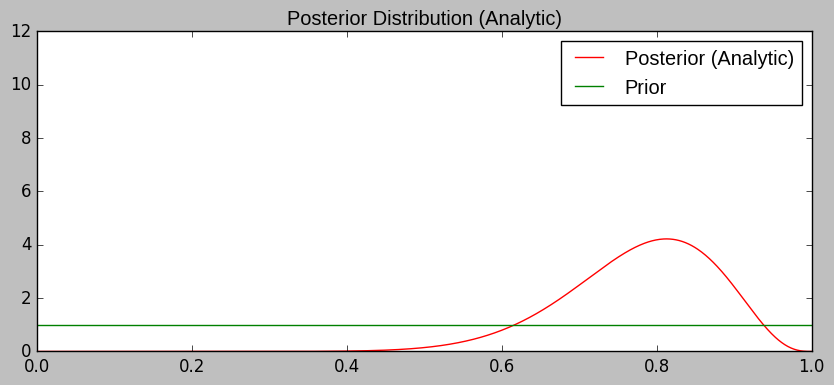

In [41]:

# Find the hyperparameters of the posterior
a1_hat = a1 + 2 + Y.sum()
a2_hat = a2 + nobs - Y.sum()

print (a1_hat, a2_hat)

# Posterior Mean
post_mean_a = a1_hat / (a1_hat + a2_hat)
print ('Posterior Mean (Analytic):', post_mean)

# Plot the analytic posterior
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
X = np.linspace(0,1, 1000)
ax.plot(X, stats.beta(a1_hat, a2_hat).pdf(X), 'r');

# Plot the prior
ax.plot(X, stats.beta(a1, a2).pdf(X), 'g');

# Cleanup
ax.set(title='Posterior Distribution (Analytic)', ylim=(0,12))
ax.legend(['Posterior (Analytic)', 'Prior']);

In [90]:
print (post_mean_a ** 2)

0.604938271605


In [61]:
p = np.random.uniform(0,1)

data = np.random.poisson(p,2)


array([0, 0])